absorbance = 0.000103(concentration) + 0.005967
concentration = (absorbance - 0.005967) / 0.000103


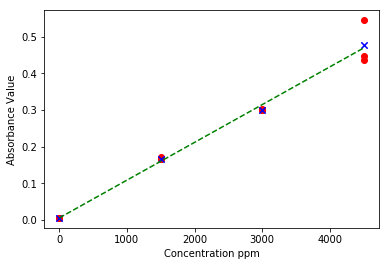

In [3]:
import pandas as pd

df = pd.read_csv('LIF Ashland Nit 12-13-18.csv')

df.rename(columns = {'Sample Name':'ID', '410 nm   [A]':'B'}, inplace=True)

g = df.groupby('ID')

final=df.merge(g.mean(),on='ID')
final2=final.merge(abs(g.max()-g.min())/g.max(), on='ID')
final2.rename(columns = {'B':'Var', 'B_x':'Abs', 'B_y':'Mean'}, inplace=True)

Results = []

for key, row in final2.iterrows():
    if float(row['Var']) > 0.1:
        Results.append('Error')
    else:
        Results.append(row['Mean'])

final2['Results'] = Results

import numpy
import matplotlib.pylab as plt
import scipy
import pylab

c = (0,0,0,1500,1500,1500,3000,3000,3000,4500,4500,4500)
a = final2.iloc[4:16, 1]
m = final2.iloc[4:16, 2]

pylab.plot(c, a, "ro")
pylab.plot(c, m,'bx')
pylab.ylabel("Absorbance Value")
pylab.xlabel("Concentration ppm")

z = numpy.polyfit(c, m, 1, rcond=None, full=False, w=None, cov=False)
p = numpy.poly1d(z)
pylab.plot(c, p(c),"g--")
print("absorbance = %.6f(concentration) + %.6f"%(z[0],z[1]))
print("concentration = (absorbance - %.6f) / %.6f"%(z[1],z[0]))

In [4]:
## Creating function based on curve fit to calculate concentration when given absorbance
## .. I want to call values from the final2["Results"] column, but these are not all numbers.

x=z[1]
y=z[0]
print((final2["Abs"] - x) / y) 
print((final2["Results"]))
#final2 ["Conc_Result"] = (final2["Results"] - x)/y
#final2

0       -19.097972
1       -28.808804
2       -48.230470
3       -28.808804
4         0.323694
5         0.323694
6         0.323694
7      1554.056970
8      1602.611135
9      1554.056970
10     2874.730255
11     2855.308589
12     2845.597756
13     4185.692706
14     4292.511869
15     5234.462667
16    11410.552438
17    11527.082434
18    10633.685801
19    11041.540785
20    13673.176521
21    13216.767372
22    11449.395770
23    11876.672421
24    10371.493310
25    10400.625809
26    14178.139836
27    15518.234786
28    13906.236513
29    13546.935693
          ...     
42    10759.926629
43    10866.745792
44    10546.288304
45    10225.830816
46    10857.034959
47    10643.396634
48    11672.744929
49    12362.214070
50     6487.160121
51     6555.135952
52     6380.340958
53     6467.738455
54     7943.785067
55     7652.460078
56     6234.678464
57     6496.870954
58     7312.580924
59     7633.038412
60     5399.546828
61    10614.264135
62     8400.194217
63     8167.

In [5]:
## trying to create an if/else function to selectively convert cells to numeric in final2['Results']

#for key, row in final2.iterrows():
#try final2.astype(float, copy=True, errors='ignore')
    
#    if row["Results"](x, int):
#        print('Yes')

for key, row in final2.iterrows():
    try:
        (final2["Results"] - x)/y
    except (ValueError, TypeError):
        continue
    else:
        final2["Final_Conc"].append = (final2["Results"] - x)/y   

In [47]:
if final2['Results'].any() == "Error":
    print("oops")
else:
    print("hi")
    
for val, item in final2['Results'].iteritems():
    try: 
        print((final2['Results'].astype(float) - x)/y)
    except (ValueError,TypeError): 
        continue
#    else:
#        print((final2['Results'].astype(float) - x)/y)

hi
